In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 26kB/s 
     |████████████████████████████████| 3.2MB 38.9MB/s 
     |████████████████████████████████| 491kB 55.7MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

# Installing fasttext

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 3768 (delta 35), reused 46 (delta 15), pack-reused 3684
Receiving objects: 100% (3768/3768), 8.20 MiB | 33.19 MiB/s, done.
Resolving deltas: 100% (2354/2354), done.


In [ ]:
cd fastText/

/content/fastText


In [ ]:
!pip install .

Processing /content/fastText
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2875528 sha256=92fff9279bd5047097a95226c782701e70564db2c1314fed17d11ac8be0e67ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-zjghjcqi/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


# Load and combine eng-hindi dictionary

In [ ]:
def load_embedding_dict(embedding_path, embedding_size, embedding_format):
    """
    Load emb dict from file, or load pre trained binary fasttext model.
    Args:
        embedding_path: path to the vec file, or binary model
        embedding_size: int, embedding_size
        embedding_format: 'bin' or 'vec'

    Returns: Embeddings dict, or fasttext pre trained model

    """
    print("Loading word embeddings from {}...".format(embedding_path))
    count = 0
    count_t = 0
    if embedding_format == 'vec':
        default_embedding = np.zeros(embedding_size)
        embedding_dict = collections.defaultdict(lambda: default_embedding)
        skip_first = embedding_format == "vec"
        with open(embedding_path) as f:
            
            for i, line in enumerate(f.readlines()):
                if skip_first and i == 0:
                    continue
                splits = line.split()
                # print(len(splits),i)
                if (len(splits) == embedding_size + 1):
                    count_t = count_t+1
                    word = splits[0]
                    embedding = np.array([float(s) for s in splits[1:]])
                    embedding_dict[word] = embedding
                else:
                    count = count+1
    elif embedding_format == 'bin':
        embedding_dict = fasttext.load_model(embedding_path)
    else:
        raise ValueError('Not supported embeddings format {}'.format(embedding_format))
    print("Done loading word embeddings.")
    print(count_t,count)
    return embedding_dict 

In [ ]:
import collections
import numpy as np


In [ ]:
hi_dictionary = load_embedding_dict("/content/gdrive/My Drive/Phd_implementation/minor_project2/wiki.hi.align.vec", embedding_size = 300, embedding_format = "vec")

Loading word embeddings from /content/gdrive/My Drive/Phd_implementation/minor_project2/wiki.hi.align.vec...
Done loading word embeddings.
157993 23


In [ ]:
en_dictionary = load_embedding_dict("/content/gdrive/My Drive/Phd_implementation/minor_project2/wiki.en.align.vec", embedding_size = 300, embedding_format = "vec")

Loading word embeddings from /content/gdrive/My Drive/Phd_implementation/minor_project2/wiki.en.align.vec...
Done loading word embeddings.
2519178 192


In [ ]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.en.align.vec

In [ ]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.hi.align.vec

In [ ]:
# !cp /content/fastText/wiki.en.align.vec "/content/gdrive/My Drive/minor_project2/"

In [ ]:
# !cp /content/fastText/wiki.hi.align.vec "/content/gdrive/My Drive/minor_project2/"

In [ ]:
z = {**hi_dictionary, **en_dictionary}

In [ ]:
# import pickle

In [ ]:
# with open('/content/gdrive/My Drive/minor_project2/en_hi_dict.txt', 'wb') as handle:
#   pickle.dump(z, handle)

# Load dataset

## Hindi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.callbacks import ModelCheckpoint

In [ ]:

data = pd.read_csv('/content/gdrive/My Drive/Phd_implementation/Location_multilingual/csv files/label_Partho - label_Partho.csv')
data2 = pd.read_csv('/content/gdrive/My Drive/Phd_implementation/Location_multilingual/csv files/label_Adarsh - label_Adarsh.csv')
data3 = pd.read_csv('/content/gdrive/My Drive/Phd_implementation/Location_multilingual/csv files/label_Keshav - label_Keshav.csv')
data4 = pd.read_csv('/content/gdrive/My Drive/Phd_implementation/Location_multilingual/csv files/label_Gaurav - label_Gaurav.csv')


In [ ]:
df1 = data.dropna(subset=['location1'])
df2 = data2.dropna(subset=['location1'])
df3 = data3.dropna(subset=['location1'])
df4 = data4.dropna(subset=['location1'])
combined_df = pd.concat([df1, df2, df3, df4], sort=False)

In [ ]:
combined_df = combined_df[['id','text','location1','location2','location3','location4','location5']]

combined_df

tweet = list(combined_df['text'])
location1 = list(combined_df['location1'])
location2 = list(combined_df['location2'])
location3 = list(combined_df['location3'])
location4 = list(combined_df['location4'])
location5 = list(combined_df['location5'])

## English

In [ ]:
data_eng = pd.read_csv("/content/gdrive/My Drive/Phd_implementation/Location_multilingual/csv files/Eq_Lab3000_updated.csv")

In [ ]:
data_eng = data_eng[['tweets','labels']]

In [ ]:
data_eng = data_eng.dropna(subset=['labels'])

In [ ]:
data_eng = data_eng[data_eng['labels'] != '0']

In [ ]:
data_eng

,tweets,labels
1,earthquake m km ssw of gambell alaska mins ago...,6 7
3,rt tremblement de terre mag km de jiangzikeng ...,8
4,rt and on the th anniversary of the earthquake...,11
5,rt and now we re reaching the present moment i...,16
8,rt massive magnitude earthquake hits taipei,6
...,...,...
2994,rt earthquake m alaska peninsula mins ago jan ...,4 5
2996,annelizebester rt laco f twenty four years ago...,14
2997,earthquake in san francisco bitcoin s dear god...,3 4 9 10
2999,here s what the office looked like after the n...,10


In [ ]:
tweet_eng = list(data_eng['tweets'])
labels = list(data_eng['labels'])

In [ ]:
labels

['6 7',
 '8',
 '11',
 '16',
 '6',
 '16',
 '4 5',
 '32',
 '8 9',
 '7 8',
 '23',
 '6 7',
 '2 3',
 ' 8 13',
 '12 13',
 '9',
 '9',
 '7',
 '5',
 '5',
 '9',
 '26',
 '14',
 '7 19',
 '26',
 '9',
 '7',
 '17 18 19 20 21 22 23 24',
 '6 7 8',
 '9',
 '14 41',
 '4 5 9',
 '8 9 10 11',
 '18',
 '10 11 12 13',
 '13 23',
 '11 12',
 '9 10 11',
 '4 5',
 '9 10 17',
 '8',
 '4 5 6',
 '1',
 '15 16 17 22 26',
 '5',
 '30 31',
 '4',
 '8',
 '7 8',
 '9 10 11',
 '8 9 10',
 '20',
 '4 5 9',
 '9 10',
 '9',
 '6 7 8 12',
 '9',
 '5 6',
 '13',
 '5 8',
 '2 14',
 '7',
 '5 6',
 '7 8 9',
 '2 10',
 '5 6',
 '5',
 '2 3 4 5',
 '8 9 10',
 '9',
 '6',
 '1 2',
 '10',
 '14',
 '8 9',
 '8',
 '9 10',
 '9 10 11 12',
 '4',
 '10 13 17 37',
 '10',
 '8',
 '6 7 11',
 '2 3',
 '4',
 '1',
 '4 5 6 10',
 '9 10',
 '11 12',
 '11 12',
 '7',
 '6 7',
 '16',
 '5',
 '3',
 '7 8',
 '1 2 3 4 6',
 '4 8',
 '13',
 '7 8 9 10',
 '5',
 '1 2 3 4 5 7',
 '5  31',
 ' 6 7',
 '3 4',
 '5 7 8',
 '4',
 '5',
 '4',
 '16',
 '6',
 '9  11 12  15',
 '7 8',
 '7',
 '14',
 '10',
 '6

# Pre process tweet

## Hindi

In [ ]:
import string,re

In [ ]:
def preprocess_tweet(text):

#     # Check characters to see if they are in punctuation
#     nopunc = [char for char in text if char not in string.punctuation]
#     # Join the characters again to form the string.
#     nopunc = ''.join(nopunc)
    # convert text to lower-case
#     nopunc = nopunc.lower()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    nopunc = re.sub(r'http\S+', '', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    
    nopunc = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' ', nopunc)
    nopunc = re.sub(r'([\;\:\|•«\n])', ' ', nopunc)
    # remove the # in #hashtag
#     nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    nopunc = re.sub(r'#\w*','',nopunc)
    # remove repeated characters
#     nopunc = word_tokenize(nopunc)
    # remove stopwords from final word list
#     return [word for word in nopunc if word not in stopwords.words('english')]
    try:
        nopunc = re.sub(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', '',nopunc)
    except re.error:
        nopunc = re.sub(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])', '', nopunc)
    nopunc = [char for char in nopunc if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [ ]:
for i in range(0,len(tweet)):
    tweet[i] = preprocess_tweet(tweet[i])

In [ ]:
all_locations = []
for i in range(0, len(location1)):
    temp = []
    if type(location1[i]) == str:
        temp.append(location1[i])
    if type(location2[i]) == str:
        temp.append(location2[i])
    if type(location3[i]) == str:
        temp.append(location3[i])
    if type(location4[i]) == str:
        temp.append(location4[i])
    if type(location5[i]) == str:
        temp.append(location5[i])
    all_locations.append(temp)

In [ ]:
all_locations_sep = []
for i in range(0,len(all_locations)):
    t = []
    for j in range(0,len(all_locations[i])):
        xx = all_locations[i][j].split()
        for k in range(0, len(xx)):
            t.append(xx[k])
    all_locations_sep.append(t)

## English

In [ ]:
def preprocess_tweet(text):

#     # Check characters to see if they are in punctuation
#     nopunc = [char for char in text if char not in string.punctuation]
#     # Join the characters again to form the string.
#     nopunc = ''.join(nopunc)
    # convert text to lower-case
#     nopunc = nopunc.lower()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    nopunc = re.sub(r'http\S+', '', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    
    nopunc = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' ', nopunc)
    nopunc = re.sub(r'([\;\:\|•«\n])', ' ', nopunc)
    # remove the # in #hashtag
#     nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    nopunc = re.sub(r'#\w*','',nopunc)
    # remove repeated characters
#     nopunc = word_tokenize(nopunc)
    # remove stopwords from final word list
#     return [word for word in nopunc if word not in stopwords.words('english')]
    try:
        nopunc = re.sub(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', '',nopunc)
    except re.error:
        nopunc = re.sub(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])', '', nopunc)
    nopunc = [char for char in nopunc if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [ ]:
for i in range(0,len(tweet_eng)):
    tweet_eng[i] = preprocess_tweet(tweet_eng[i])

In [ ]:
labels[0].split()

['6', '7']

In [ ]:
all_locations_sep_eng = []
for i in range(0,len(labels)):
    # print(i)
    t = []
    xx = labels[i].split()
    for k in range(0, len(xx)):
            t.append(int((xx[k]))-1)
    all_locations_sep_eng.append(t)

In [ ]:
all_locations_sep_eng

[[5, 6],
 [7],
 [10],
 [15],
 [5],
 [15],
 [3, 4],
 [31],
 [7, 8],
 [6, 7],
 [22],
 [5, 6],
 [1, 2],
 [7, 12],
 [11, 12],
 [8],
 [8],
 [6],
 [4],
 [4],
 [8],
 [25],
 [13],
 [6, 18],
 [25],
 [8],
 [6],
 [16, 17, 18, 19, 20, 21, 22, 23],
 [5, 6, 7],
 [8],
 [13, 40],
 [3, 4, 8],
 [7, 8, 9, 10],
 [17],
 [9, 10, 11, 12],
 [12, 22],
 [10, 11],
 [8, 9, 10],
 [3, 4],
 [8, 9, 16],
 [7],
 [3, 4, 5],
 [0],
 [14, 15, 16, 21, 25],
 [4],
 [29, 30],
 [3],
 [7],
 [6, 7],
 [8, 9, 10],
 [7, 8, 9],
 [19],
 [3, 4, 8],
 [8, 9],
 [8],
 [5, 6, 7, 11],
 [8],
 [4, 5],
 [12],
 [4, 7],
 [1, 13],
 [6],
 [4, 5],
 [6, 7, 8],
 [1, 9],
 [4, 5],
 [4],
 [1, 2, 3, 4],
 [7, 8, 9],
 [8],
 [5],
 [0, 1],
 [9],
 [13],
 [7, 8],
 [7],
 [8, 9],
 [8, 9, 10, 11],
 [3],
 [9, 12, 16, 36],
 [9],
 [7],
 [5, 6, 10],
 [1, 2],
 [3],
 [0],
 [3, 4, 5, 9],
 [8, 9],
 [10, 11],
 [10, 11],
 [6],
 [5, 6],
 [15],
 [4],
 [2],
 [6, 7],
 [0, 1, 2, 3, 5],
 [3, 7],
 [12],
 [6, 7, 8, 9],
 [4],
 [0, 1, 2, 3, 4, 6],
 [4, 30],
 [5, 6],
 [2, 3],
 [4, 6, 

# Function to tokenize

## Hindi

In [ ]:
import string, re, sys, codecs

In [ ]:
# from indicnlp.common import IndicNlpException

### tokenizer patterns 
triv_tokenizer_indic_pat=re.compile(r'(['+string.punctuation+r'\u0964\u0965'+r'])')
triv_tokenizer_urdu_pat=re.compile(r'(['+string.punctuation+r'\u0609\u060A\u060C\u061E\u066A\u066B\u066C\u066D\u06D4'+r'])')

## date, numbers, section/article numbering
pat_num_seq=re.compile(r'([0-9]+ [,.:/] )+[0-9]+')

def trivial_tokenize_indic(s): 
    """
    A trivial tokenizer which just tokenizes on the punctuation boundaries. This also includes punctuations for the Indian language scripts
      - the purna virama and the deergha virama
    returns a list of tokens   
    """
    tok_str=triv_tokenizer_indic_pat.sub(r' \1 ',s.replace('\t',' '))
#     return re.sub(r'[ ]+',' ',tok_str).strip(' ').split(' ')

    s=re.sub(r'[ ]+',' ',tok_str).strip(' ')
    
    # do not tokenize numbers and dates
    new_s=''
    prev=0
    for m in pat_num_seq.finditer(s):
        start=m.start()
        end=m.end()
        if start>prev:
            new_s=new_s+s[prev:start]
            new_s=new_s+s[start:end].replace(' ','')
            prev=end
   
    new_s=new_s+s[prev:]
    s=new_s
    
    return s.split(' ')

def trivial_tokenize_urdu(s): 
    """
    A trivial tokenizer which just tokenizes on the punctuation boundaries. This also includes punctuations for the Urdu script.
    These punctuations characters were identified from the Unicode database for Arabic script by looking for punctuation symbols.
    returns a list of tokens   
    """
    tok_str=triv_tokenizer_urdu_pat.sub(r' \1 ',s.replace('\t',' '))
    return re.sub(r'[ ]+',' ',tok_str).strip(' ').split(' ')

def trivial_tokenize(s,lang='hi'): 
    """
    Trivial tokenizer for languages in the Indian sub-continent
    """
    if lang=='ur':
        return trivial_tokenize_urdu(s)
    else:
        return trivial_tokenize_indic(s)

## English

In [ ]:

# import nltk
# nltk.download('all')

In [ ]:
# from nltk.tokenize import word_tokenize

# One hot encode

## Hindi

In [ ]:
def boolean_vec(tweet):
    import math
    one_hot_encoded=[]
    for i in range(0,len(tweet)):
        tText = tweet[i]
        splits = trivial_tokenize(tText)
        temp = [0]*len(splits)
        for x in range(0,len(splits)):
            for l in all_locations_sep[i]:
                if l==splits[x]:
                    temp[x] = 1
#             if l1==x or l1 in x:
#                 temp.append(1)
#             if type(l2)==str and (l2==x or l2 in x):
#                 temp.append(1)
#             if type(l3)==str and (l3==x or l3 in x):
#                 temp.append(1)
#             if type(l4)==str and (l4==x or l4 in x):
#                 temp.append(1)
#             if type(l5)==str and (l5==x or l5 in x):
#                 temp.append(1)
#             else:
#                 temp.append(0)
        one_hot_encoded.append(temp)
        temp=[]
    return one_hot_encoded

In [ ]:
one_hot_encoded = boolean_vec(tweet)

In [ ]:
maxlen = 0
for i in range(0,len(one_hot_encoded)):
    maxlen = max(len(one_hot_encoded[i]),maxlen)
print(maxlen)

72


In [ ]:
MAX_SEQUENCE_LENGTH = maxlen #72

In [ ]:
for i in range(0,len(one_hot_encoded)):
    pad_len = MAX_SEQUENCE_LENGTH - len(one_hot_encoded[i])
    for j in range(0,pad_len):
        one_hot_encoded[i].append(0)

In [ ]:
for i in range(0,len(one_hot_encoded)):
    if(len(one_hot_encoded[i]) != MAX_SEQUENCE_LENGTH):
        print("Not encoded")

## English

In [ ]:
def boolean_vec_eng(tweet):
    import math
    one_hot_encoded=[]
    for i in range(0,len(tweet)):
        tText = tweet[i]
        splits = trivial_tokenize(tText)
        temp = [0]*len(splits)
        bound = list(range(0,len(splits)))
        # for x in range(0,len(splits)):
        for l in all_locations_sep_eng[i]:
            if l in bound:
                temp[l] = 1
#             if l1==x or l1 in x:
#                 temp.append(1)
#             if type(l2)==str and (l2==x or l2 in x):
#                 temp.append(1)
#             if type(l3)==str and (l3==x or l3 in x):
#                 temp.append(1)
#             if type(l4)==str and (l4==x or l4 in x):
#                 temp.append(1)
#             if type(l5)==str and (l5==x or l5 in x):
#                 temp.append(1)
#             else:
#                 temp.append(0)
        one_hot_encoded.append(temp)
        temp=[]
    return one_hot_encoded

In [ ]:
one_hot_encoded_eng = boolean_vec_eng(tweet_eng)

In [ ]:
tweet_eng[176]
all_locations_sep_eng[176]

[7, 8, 9]

In [ ]:
i = 176
m = trivial_tokenize(tweet_eng[i])
for j in range(0,len(m)):
    print(m[j],":",one_hot_encoded_eng[i][j])

earthquake : 0
usgs : 0
forecast : 0
m : 0
km : 0
n : 0
of : 0
chichi : 1
shima : 1
japan : 1
time : 0
utc : 0
at : 0
epicenter : 0
location : 0
n : 0
e : 0
dep : 0


In [ ]:
maxlen_eng = 0
for i in range(0,len(one_hot_encoded_eng)):
    maxlen_eng = max(len(one_hot_encoded_eng[i]),maxlen_eng)
print(maxlen_eng)

55


In [ ]:
for i in range(0,len(one_hot_encoded_eng)):
    pad_len = MAX_SEQUENCE_LENGTH - len(one_hot_encoded_eng[i])
    for j in range(0,pad_len):
        one_hot_encoded_eng[i].append(0)

In [ ]:
for i in range(0,len(one_hot_encoded_eng)):
    if(len(one_hot_encoded_eng[i]) != MAX_SEQUENCE_LENGTH):
        print("Not encoded")

# Embedding word vector

In [ ]:
print(len(combined_df),len(tweet),len(one_hot_encoded))
print(len(data_eng),len(tweet_eng),len(one_hot_encoded_eng))

1942 1942 1942
1903 1903 1903


In [ ]:
window_length = 72
n_features = 300

In [ ]:
def get_word_vector(word):
    embedding_vector = z.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        return embedding_vector

In [ ]:
# get_word_vector('thetftfft')

In [ ]:
def text_to_vector(text):
    
    words = trivial_tokenize(text)

    window = words[:window_length]
    
    x = np.zeros((window_length, n_features))

    for i, word in enumerate(window):
        if get_word_vector(word) is not None:
            x[i, :] = get_word_vector(word).astype('float32')

    return x

In [ ]:
def df_to_data(df,tw):
    
    x = np.zeros((len(df), window_length, n_features), dtype='float32')

    for i, comment in enumerate(tw):
        x[i, :] = text_to_vector(comment)

    return x

In [ ]:
X_data_hi = df_to_data(combined_df,tweet)
X_data_en = df_to_data(data_eng,tweet_eng)

In [ ]:
X_data_hi.shape

(1942, 72, 300)

In [ ]:
X_data_en.shape

(1903, 72, 300)

In [ ]:
X_data = np.concatenate((X_data_hi, X_data_en), axis=0)

In [ ]:
X_data.shape

(3845, 72, 300)

In [ ]:
from keras.utils import to_categorical
y_hi = [to_categorical(i, num_classes=2) for i in one_hot_encoded]

In [ ]:
from keras.utils import to_categorical
y_en = [to_categorical(i, num_classes=2) for i in one_hot_encoded_eng]

In [ ]:
y_hi = np.asarray(y_hi)
y_en = np.asarray(y_en)

In [ ]:
y_hi.shape

(1942, 72, 2)

In [ ]:
y_en.shape

(1903, 72, 2)

In [ ]:
y_data = np.concatenate((y_hi,y_en),axis=0)

In [ ]:
y_data.shape

(3845, 72, 2)

# Train test split

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)\nprint(X_train.shape,X_test.shape,y_train.shape,y_test.shape)\n'

# Install keras contrib

In [ ]:
cd /content/

/content


In [ ]:
!git clone https://www.github.com/keras-team/keras-contrib.git

Cloning into 'keras-contrib'...
remote: Enumerating objects: 3634, done.
remote: Total 3634 (delta 0), reused 0 (delta 0), pack-reused 3634
Receiving objects: 100% (3634/3634), 861.24 KiB | 8.20 MiB/s, done.
Resolving deltas: 100% (2330/2330), done.


In [ ]:
cd keras-contrib

/content/keras-contrib


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating keras_contrib.egg-info
writing keras_contrib.egg-info/PKG-INFO
writing dependency_links to keras_contrib.egg-info/dependency_links.txt
writing requirements to keras_contrib.egg-info/requires.txt
writing top-level names to keras_contrib.egg-info/top_level.txt
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/keras_contrib
copying keras_contrib/__init__.py -> build/lib/keras_contrib
creating build/lib/keras_contrib/layers
copying keras_contrib/layers/capsule.py -> build/lib/keras_contrib/layers
copying keras_contrib/layers/core.py -> build/lib/keras_contrib/layers
copying keras_contrib/layers/__init__.py -> build/lib/keras_contrib/layers
copying keras_contrib/layers/crf.py -> build/lib/keras_contrib/layers
creating bui

# Model2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    '''
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    '''
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["other","disaster_place"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()

    # Plot of a ROC curve for a specific class
    '''
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    '''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce
def report_average(*args):
    report_list = list()
    for report in args:
        splited = [' '.join(x.split()) for x in report.split('\n')]
        splited = [x for x in splited if x != '']  
        splited[1:3] = [' '.join(splited[1:3])]
        del splited[2:4]
        #del splited[-1]
        #print(splited)
        header = [x for x in splited[0].split(' ')]
        #print(header)
        data = np.array(splited[1].split(' ')).reshape(-1, len(header) + 1)
        #print(data)
        data = np.delete(data, 0, 1).astype(float)
        #print(data)
        avg_total = np.array([x for x in splited[2].split(' ')][2:]).astype(float).reshape(-1, len(header))
        df = pd.DataFrame(np.concatenate((data, avg_total)), columns=header)
        report_list.append(df)
    res = reduce(lambda x, y: x.add(y, fill_value=0), report_list) / len(report_list)
    return res.rename(index={res.index[-1]: 'weighted avg'})


In [ ]:
###########Definining Embedding Layer for neural network
from keras.models import Sequential, Model, load_model
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Dense, Input, Flatten,Bidirectional,Dropout, concatenate,Concatenate
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Activation, RepeatVector, SimpleRNN, GRU,TimeDistributed
from sklearn import metrics
from keras.utils.vis_utils import plot_model
from keras.layers.core import Permute
from keras import layers
from keras import backend as K
from keras_contrib.layers.crf import CRF
from sklearn.metrics import classification_report


def create_model_cnn():
    model = None
    convs = []

    input_i = Input(shape=(72,300,),dtype='float32')
    filter_sizes = [1,2,3]
    ############For different size filters
    for fsz in filter_sizes:
        x = Conv1D(nb_filter=256,filter_length=fsz,activation='relu',padding="same")(input_i)
        convs.append(x)
    x = Concatenate()(convs)
    x = Conv1D(128, 2, activation='relu', padding="same")(x)
    x = Conv1D(64, 2, activation ='relu', padding ="same")(x)
    x = CRF(2, learn_mode = 'marginal')(x)
    #preds = TimeDistributed(Dense(2, activation="sigmoid"))(x)
    model = Model(input_i, x)
    crf_layer = CRF(2, learn_mode = 'marginal')
    # compile the model
    model.compile(optimizer='adam', loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])
    return model

(3076, 72, 2)
(769, 72, 2)
(3076, 72, 300)
(769, 72, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=3)`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/keras-contrib/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/content/keras-contrib/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '



Train on 3076 samples, validate on 769 samples
Epoch 1/50
 - 12s - loss: 0.2926 - crf_marginal_accuracy: 0.8936 - val_loss: 0.0481 - val_crf_marginal_accuracy: 0.9827

Epoch 00001: val_loss improved from inf to 0.04807, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best1K_fold.hdf5
Epoch 2/50
 - 12s - loss: 0.0316 - crf_marginal_accuracy: 0.9892 - val_loss: 0.0260 - val_crf_marginal_accuracy: 0.9913

Epoch 00002: val_loss improved from 0.04807 to 0.02602, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best1K_fold.hdf5
Epoch 3/50
 - 12s - loss: 0.0210 - crf_marginal_accuracy: 0.9930 - val_loss: 0.0237 - val_crf_marginal_accuracy: 0.9921

Epoch 00003: val_loss improved from 0.02602 to 0.02374, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


(3076, 72, 2)
(769, 72, 2)
(3076, 72, 300)
(769, 72, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=3)`
/content/keras-contrib/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/content/keras-contrib/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('C

Train on 3076 samples, validate on 769 samples
Epoch 1/50
 - 12s - loss: 0.4199 - crf_marginal_accuracy: 0.8791 - val_loss: 0.1929 - val_crf_marginal_accuracy: 0.9836

Epoch 00001: val_loss improved from inf to 0.19286, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best2K_fold.hdf5
Epoch 2/50
 - 11s - loss: 0.0584 - crf_marginal_accuracy: 0.9877 - val_loss: 0.0265 - val_crf_marginal_accuracy: 0.9922

Epoch 00002: val_loss improved from 0.19286 to 0.02648, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best2K_fold.hdf5
Epoch 3/50
 - 11s - loss: 0.0219 - crf_marginal_accuracy: 0.9924 - val_loss: 0.0226 - val_crf_marginal_accuracy: 0.9930

Epoch 00003: val_loss improved from 0.02648 to 0.02256, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingua

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


(3076, 72, 2)
(769, 72, 2)
(3076, 72, 300)
(769, 72, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=3)`
/content/keras-contrib/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/content/keras-contrib/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('C

Train on 3076 samples, validate on 769 samples
Epoch 1/50
 - 12s - loss: 0.1184 - crf_marginal_accuracy: 0.9440 - val_loss: 0.0296 - val_crf_marginal_accuracy: 0.9900

Epoch 00001: val_loss improved from inf to 0.02962, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best3K_fold.hdf5
Epoch 2/50
 - 11s - loss: 0.0239 - crf_marginal_accuracy: 0.9920 - val_loss: 0.0223 - val_crf_marginal_accuracy: 0.9926

Epoch 00002: val_loss improved from 0.02962 to 0.02231, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best3K_fold.hdf5
Epoch 3/50
 - 11s - loss: 0.0179 - crf_marginal_accuracy: 0.9941 - val_loss: 0.0206 - val_crf_marginal_accuracy: 0.9934

Epoch 00003: val_loss improved from 0.02231 to 0.02061, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingua

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


(3076, 72, 2)
(769, 72, 2)
(3076, 72, 300)
(769, 72, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=3)`
/content/keras-contrib/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/content/keras-contrib/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('C

Train on 3076 samples, validate on 769 samples
Epoch 1/50
 - 12s - loss: 0.4285 - crf_marginal_accuracy: 0.8594 - val_loss: 0.1474 - val_crf_marginal_accuracy: 0.9850

Epoch 00001: val_loss improved from inf to 0.14742, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best4K_fold.hdf5
Epoch 2/50
 - 11s - loss: 0.0367 - crf_marginal_accuracy: 0.9892 - val_loss: 0.0255 - val_crf_marginal_accuracy: 0.9917

Epoch 00002: val_loss improved from 0.14742 to 0.02548, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best4K_fold.hdf5
Epoch 3/50
 - 11s - loss: 0.0210 - crf_marginal_accuracy: 0.9930 - val_loss: 0.0240 - val_crf_marginal_accuracy: 0.9922

Epoch 00003: val_loss improved from 0.02548 to 0.02401, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingua

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


(3076, 72, 2)
(769, 72, 2)
(3076, 72, 300)
(769, 72, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=256, kernel_size=3)`
/content/keras-contrib/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/content/keras-contrib/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('C

Train on 3076 samples, validate on 769 samples
Epoch 1/50
 - 12s - loss: 0.4519 - crf_marginal_accuracy: 0.8606 - val_loss: 0.1908 - val_crf_marginal_accuracy: 0.9822

Epoch 00001: val_loss improved from inf to 0.19078, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best5K_fold.hdf5
Epoch 2/50
 - 11s - loss: 0.0780 - crf_marginal_accuracy: 0.9864 - val_loss: 0.0255 - val_crf_marginal_accuracy: 0.9912

Epoch 00002: val_loss improved from 0.19078 to 0.02549, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best5K_fold.hdf5
Epoch 3/50
 - 11s - loss: 0.0232 - crf_marginal_accuracy: 0.9921 - val_loss: 0.0211 - val_crf_marginal_accuracy: 0.9933

Epoch 00003: val_loss improved from 0.02549 to 0.02106, saving model to /content/gdrive/My Drive/Phd_implementation/Location_multilingua

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

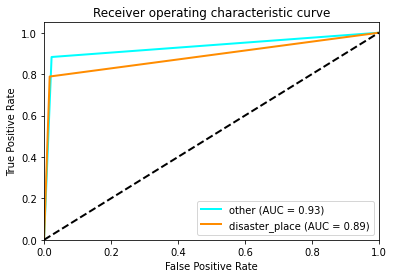

In [ ]:
# applying k-fold

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42) 
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Class_report_result= []
accuracy_score_result =[]
ROC_AUC_score_result = []

i = 1
for train, test in kf.split(X_data):
    print(y_data[train].shape)
    print(y_data[test].shape)
    print(X_data[train].shape)
    print(X_data[test].shape)


    filepath="/content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Weight_1-2-3-2-2_CNN_best"+str(i)+"K_fold.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    model = create_model_cnn()
    model.fit(X_data[train], y_data[train] ,validation_data=(X_data[test], y_data[test]), epochs = 50,batch_size=32,callbacks=callbacks_list, verbose = 2)
    

    print('best weight loding...')
    model.load_weights(filepath)
    print('best weight loaded')

    p = model.predict(np.array(X_data[test]))

   
    print(classification_report(np.argmax(y_data[test], 2).ravel(), np.argmax(p, axis=2).ravel(),labels=[0,1], target_names=["other","disaster_place"]))
    Class_report = classification_report(np.argmax(y_data[test], 2).ravel(), np.argmax(p, axis=2).ravel(),labels=[0,1], target_names=["other","disaster_place"])
    Class_report_result.append(Class_report)


    '''
    from sklearn.metrics import accuracy_score
    print("Accuracy score =", accuracy_score(label_test,predictions_test1))
    accuracy_score_result.append(accuracy_score(label_test,predictions_test1))

    from sklearn.metrics import roc_auc_score
    print("ROC_AUC score =", roc_auc_score(label_test,predictions_test))
    ROC_AUC_score_result.append(roc_auc_score(label_test,predictions_test))
    '''
    plt.clf()
    cnf_matrix = metrics.confusion_matrix(np.argmax(y_data[test],2).ravel(),np.argmax(p, axis =2).ravel())
    #print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix, classes = ["other","disaster_place"], normalize = True)
    #plt.show()

    
    plt.savefig("/content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/Confusion_1-2-3-2-2_layer_CNN_best"+str(i)+"k_fold.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')

    plt.clf()
    plot_AUC_ROC(np.argmax(y_data[test],2), np.argmax(p, axis =2))
    plt.savefig("/content/gdrive/My Drive/Phd_implementation/Location_multilingual/Final_models/Bi_lingual/CNN/CNN_1-2-3-2-2-256-128-64/ROC_1-2-3-2-2_layer_CNN_best"+str(i)+"K_fold.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')
 
    i=i+1

# the function 'report_average' is used to do the average of all the classification report coming from K-fold
report_ave = report_average(Class_report_result[0],Class_report_result[1], Class_report_result[2], Class_report_result[3], Class_report_result[4])

print (Class_report_result[0])
print (Class_report_result[1])
print (Class_report_result[2])
print (Class_report_result[3])
print (Class_report_result[4])

print (report_ave)

#print("Average accuracy score = ", np.mean(accuracy_score_result))

#print("Average ROC AUC score = ", np.mean(ROC_AUC_score_result))

## Manual Testing

In [ ]:
def check_model2(tweet):
    text = preprocess_tweet(tweet)
    
    x = np.zeros((1, window_length, n_features), dtype='float32')
    x[0, :] = text_to_vector(text)
    
    
    p = model4.predict(x)

    op = (np.argmax(p, axis=2))
    i = 0
    
    for word in trivial_tokenize(text):
        print(word,':',op[0][i])
        i+=1
    

In [ ]:
check_model2('State of natural disaster declared as extreme flooding displaces 50 000 in Congo')

State : 0
of : 0
natural : 0
disaster : 0
declared : 0
as : 0
extreme : 0
flooding : 0
displaces : 0
50 : 0
000 : 0
in : 0
Congo : 0


In [ ]:
'''
def check_model3(tweet):

    text = preprocess_tweet(tweet)
 
    x = np.zeros((1, window_length, n_features), dtype='float32')
    x[0, :] = text_to_vector(text)
    
    p = model4.predict(x)

    op = (np.argmax(p, axis=2))
    
    return op[0]
'''  

In [ ]:
'''
tweet_joined = tweet + tweet_eng
one_hot_encoded_joined = one_hot_encoded + one_hot_encoded_eng
'''

In [ ]:
check_model2('महाराष्ट्र  केरल  गुजरात  कर्नाटक और मध्य प्रदेश में भारी बारिश और बाढ़ की वजह से  160 से अधिक लोगों की मौत बेहद दुखद है। एनडीआरएफ  वायुसेना और नेवी ने लाखों लोगों को सुरक्षित स्थानों पर पहुंचाया है। ईश्वर से बाढ़ प्रभावित लोगों के सुरक्षित रहने की कामना करता हूं।')

महाराष्ट्र : 1
केरल : 1
गुजरात : 0
कर्नाटक : 1
और : 0
मध्य : 0
प्रदेश : 0
में : 0
भारी : 0
बारिश : 0
और : 0
बाढ़ : 0
की : 0
वजह : 0
से : 0
160 : 0
से : 0
अधिक : 0
लोगों : 0
की : 0
मौत : 0
बेहद : 0
दुखद : 0
है : 0
। : 0
एनडीआरएफ : 0
वायुसेना : 0
और : 0
नेवी : 1
ने : 0
लाखों : 0
लोगों : 0
को : 0
सुरक्षित : 0
स्थानों : 0
पर : 0
पहुंचाया : 0
है : 0
। : 0
ईश्वर : 0
से : 0
बाढ़ : 0
प्रभावित : 0
लोगों : 0
के : 0
सुरक्षित : 0
रहने : 0
की : 0
कामना : 0
करता : 0
हूं : 0
। : 0


In [ ]:
check_model2("moderate earthquake kuril islands 16 january at 10 am")

moderate : 0
earthquake : 0
kuril : 1
islands : 1
16 : 0
january : 0
at : 0
10 : 0
am : 0


In [ ]:
check_model2("#Dorian 'डोरियन तूफान के बाद जल  खाद्य सहायता  आश्रय और संचार की आवश्यकताएं बहामास के लोगों की मदद कर रही यूएन एजेंसियों की सर्वोच्च मानवीय प्राथमिकताएं हैं'")

डोरियन : 0
तूफान : 0
के : 0
बाद : 0
जल : 0
खाद्य : 0
सहायता : 0
आश्रय : 0
और : 0
संचार : 0
की : 0
आवश्यकताएं : 0
बहामास : 1
के : 0
लोगों : 0
की : 0
मदद : 0
कर : 0
रही : 0
यूएन : 0
एजेंसियों : 0
की : 0
सर्वोच्च : 0
मानवीय : 0
प्राथमिकताएं : 0
हैं : 0


In [ ]:
check_model2("earthquake sismo m strikes km sw of laguna niguel california 30 min ago more info")

earthquake : 0
sismo : 0
m : 0
strikes : 0
km : 0
sw : 0
of : 0
laguna : 1
niguel : 1
california : 1
30 : 0
min : 0
ago : 0
more : 0
info : 0
